# Data Cleaning, Transformation and Extraction

**This notebook is for Data Cleaning which is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

In [1]:
# importing libraries used to data representation and 
import pandas as pd
import numpy as np
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
 
# adding scripts folder to the system path
sys.path.insert(0, '../scripts/')

In [3]:
import DataUtils as du

In [4]:
import PlotUtils as pu

In [5]:
# there could be non standard missing values
missing_values = ["n/a", "na", "--", '?', None, 'undefined']
# read the dataset
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values = missing_values)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


### Lets Explore the Data before cleaning

In [6]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
db.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"149,010.00","150,000.00","150,000.00","150,000.00","149,431.00","148,935.00","149,429.00","122,172.00","122,189.00","150,000.00",...,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00"
mean,"10,138,874,654,256,523,264.00",499.19,498.80,"104,608.56","208,201,639,651,672.22","41,882,819,545.03","48,474,547,977,654.16",109.80,17.66,"13,300.05",...,"11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,"2,893,172,512,268,425,216.00",288.61,288.10,"81,037.62","21,488,090,841.37","2,447,443,358,621.66","22,416,372,027,957.65",619.78,84.79,"23,971.88",...,"6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,386.51","244,142,874.38"
min,"6,917,537,518,543,529,984.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,246,953,990,144.00",250.00,251.00,"57,440.50","208,201,401,263,249.00","33,651,295,581.50","35,460,708,865,439.00",32.00,2.00,43.00,...,"5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,010.50","243,106,803.00"
50%,"7,349,883,264,156,584,960.00",499.00,500.00,"86,399.00","208,201,546,329,113.00","33,663,706,799.00","35,722,009,426,311.00",45.00,5.00,63.00,...,"11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00","41,143,312.00","455,841,077.50"
75%,"13,042,425,978,957,576,192.00",749.00,750.00,"132,430.25","208,201,771,619,103.00","33,683,490,769.00","86,119,704,674,953.00",70.00,15.00,"19,710.75",...,"17,448,518.00","16,515,562.00","17,470,478.00","16,507,268.00","633,174,167.00","12,431,624.00","631,691,786.00","12,384,148.00","49,034,238.50","665,705,544.00"
max,"13,186,541,167,134,199,808.00",999.00,999.00,"1,859,336.00","214,074,303,349,628.00","882,397,108,489,451.00","99,001,201,327,774.00","96,923.00","7,120.00","378,160.00",...,"23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00","78,331,311.00","902,969,616.00"


Distinct value counts/frequencies of each column to determine if there are any columns with only a single value/all different values

In [10]:
pd.DataFrame(db.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

,Unique Value Count
UL TP > 300 Kbps (%),64
50 Kbps < UL TP < 300 Kbps (%),69
250 Kbps < DL TP < 1 Mbps (%),74
50 Kbps < DL TP < 250 Kbps (%),85
10 Kbps < UL TP < 50 Kbps (%),86
DL TP > 1 Mbps (%),86
UL TP < 10 Kbps (%),99
DL TP < 50 Kbps (%),101
Handset Manufacturer,170
Avg RTT UL (ms),723


all the columns have a unique value count of > 64 so we can use them for the data analysis

In [11]:
db.duplicated().value_counts()

False    150001
dtype: int64

In [12]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

As shown above the most of the columns have missing values, so lets handle the missing values

### Handling Missing Values

In [13]:
# calculate the percentage of missing values
du.missing_percent(db)

The dataset contains 12.72 % missing values.


In [14]:
# the datatype of each column
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [15]:
# the name and datatype of each column with null count
pd.DataFrame(data=list(zip(db.columns, db.dtypes, db.isna().sum(), round((db.isna().sum() * 100)/150001))), columns=["name", "dtype", "# missing", "% Missing"])

,name,dtype,# missing,% Missing
0,Bearer Id,float64,991,1.00
1,Start,object,1,0.00
2,Start ms,float64,1,0.00
3,End,object,1,0.00
4,End ms,float64,1,0.00
5,Dur. (ms),float64,1,0.00
6,IMSI,float64,570,0.00
7,MSISDN/Number,float64,1066,1.00
8,IMEI,float64,572,0.00
9,Last Location Name,object,1153,1.00


the data have two datatypes
- object and float 
***
> one of these methods can be the option
- Deleting the columns with missing data 
... this is an extreme case and should only be used when there are many null values in the column
... there are 150001 rows in the data, based on some articles When column has more than 80% to 95% missing value, its advised to drop it.

- the following columns are missing a lot of data, but only one is missing more than 80% of its data

> 14 	TCP DL Retrans. Vol (Bytes) 	float64 	88146

> 15 	TCP UL Retrans. Vol (Bytes) 	float64 	96649 

> 24 	HTTP DL (Bytes) 	float64 	81474

> 25 	HTTP UL (Bytes) 	float64 	81810

> 31 	Nb of sec with 125000B < Vol DL 	float64 	97538

> 32 	Nb of sec with 1250B < Vol UL < 6250B 	float64 	92894

> 33 	Nb of sec with 31250B < Vol DL < 125000B 	float64 	93586

> 34 	Nb of sec with 37500B < Vol UL 	float64 	130254 
           - missing 87% of data so this column can be removed

> 35 	Nb of sec with 6250B < Vol DL < 31250B 	float64 	88317

> 36 	Nb of sec with 6250B < Vol UL < 37500B 	float64 	111843


In [16]:
# Nb of sec with 37500B < Vol UL
# - missing 87% of data so this column can be removed
# db.drop("Nb of sec with 37500B < Vol UL", axis=1, inplace=True)

# we can also remove all the columns where > 50% of the data is missing
db = db[db.columns[db.isnull().mean() < 0.65]]

In [17]:
db.shape

(150001, 52)

- Filling the missing data with a value – Imputation

> Imputation is a method to fill in the missing values with estimated ones

> lets choose a feature filling method by taking look at the skewness of the data

> we can do Imputation by Quantitative (Mean/Median) and Categorical (Mode/Static Value)

In [18]:
db.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)'

In [19]:
db.skew(axis=0)

Bearer Id                                    0.03
Start ms                                     0.00
End ms                                      -0.00
Dur. (ms)                                    3.95
IMSI                                        41.05
MSISDN/Number                              332.16
IMEI                                         1.07
Avg RTT DL (ms)                             62.91
Avg RTT UL (ms)                             28.46
Avg Bearer TP DL (kbps)                      2.59
Avg Bearer TP UL (kbps)                      4.50
TCP DL Retrans. Vol (Bytes)                 15.95
TCP UL Retrans. Vol (Bytes)                 84.11
DL TP < 50 Kbps (%)                         -2.30
50 Kbps < DL TP < 250 Kbps (%)               3.27
250 Kbps < DL TP < 1 Mbps (%)                4.57
DL TP > 1 Mbps (%)                           5.37
UL TP < 10 Kbps (%)                         -8.99
10 Kbps < UL TP < 50 Kbps (%)               10.94
50 Kbps < UL TP < 300 Kbps (%)              21.88


the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median.
- lets start with columns with high missing values

In [20]:
import matplotlib.pyplot as plt


(array([6.0586e+04, 8.8600e+02, 1.3900e+02, 4.2000e+01, 1.8000e+01,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 6.69220e+03, 1.33834e+04, 2.00746e+04, 2.67658e+04,
        3.34570e+04, 4.01482e+04, 4.68394e+04, 5.35306e+04, 6.02218e+04,
        6.69130e+04]),
 <BarContainer object of 10 artists>)

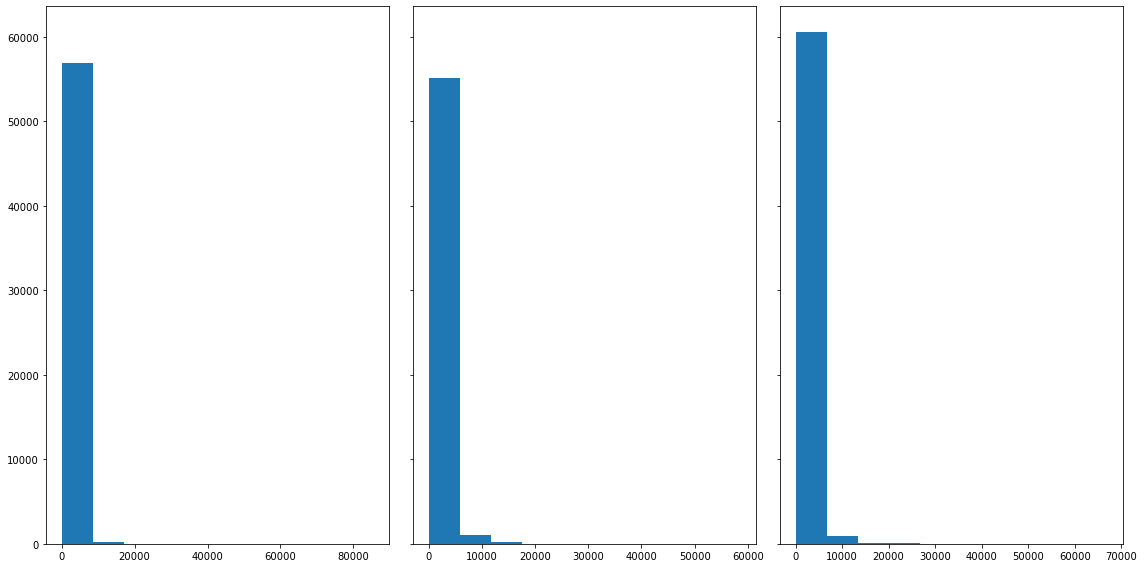

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True)
fig.set_size_inches(16, 8)
n_bins = 10

axes[0].hist(db['Nb of sec with 1250B < Vol UL < 6250B'], n_bins)
axes[1].hist(db['Nb of sec with 31250B < Vol DL < 125000B'], n_bins)
axes[2].hist(db['Nb of sec with 6250B < Vol DL < 31250B'], n_bins)

As shown in the above graph, those columns are skewed, so we can use median to fill the missing values

In [22]:
column_names = ['Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B',
               'Nb of sec with 6250B < Vol DL < 31250B']
db = du.fill_using_median(db, column_names)

In [23]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                     991
Start                                           1
Start ms                                        1
End                                             1
End ms                                          1
Dur. (ms)                                       1
IMSI                                          570
MSISDN/Number                                1066
IMEI                                          572
Last Location Name                           1153
Avg RTT DL (ms)                             27829
Avg RTT UL (ms)                             27812
Avg Bearer TP DL (kbps)                         1
Avg Bearer TP UL (kbps)                         1
TCP DL Retrans. Vol (Bytes)                 88146
TCP UL Retrans. Vol (Bytes)                 96649
DL TP < 50 Kbps (%)                           754
50 Kbps < DL TP < 250 Kbps (%)                754
250 Kbps < DL TP < 1 Mbps (%)                 754
DL TP > 1 Mbps (%)                            754


(array([1.21878e+05, 2.30000e+02, 5.30000e+01, 7.00000e+00, 1.30000e+01,
        3.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  712., 1424., 2136., 2848., 3560., 4272., 4984., 5696.,
        6408., 7120.]),
 <BarContainer object of 10 artists>)

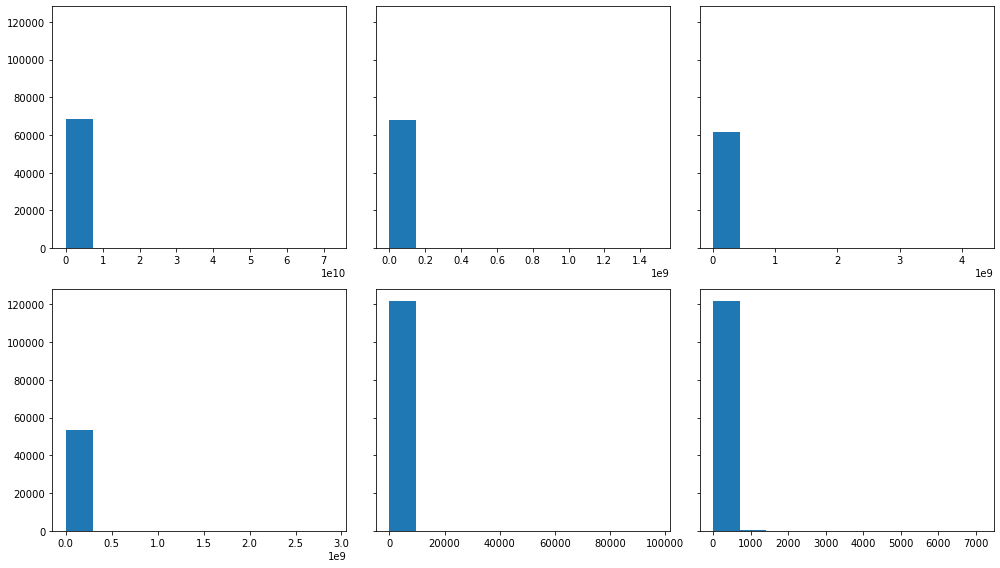

In [24]:
fig1, axes1 = plt.subplots(nrows=2, ncols=3, sharey=True, tight_layout=True)
fig1.set_size_inches(14, 8)
n_bins = 10

axes1[0][0].hist(db['HTTP DL (Bytes)'], n_bins)
axes1[0][1].hist(db['HTTP UL (Bytes)'], n_bins)
axes1[0][2].hist(db['TCP DL Retrans. Vol (Bytes)'], n_bins)
axes1[1][0].hist(db['TCP UL Retrans. Vol (Bytes)'], n_bins)
axes1[1][1].hist(db['Avg RTT DL (ms)'], n_bins)
axes1[1][2].hist(db['Avg RTT UL (ms)'], n_bins)

As shown in the above graph, those columns are skewed, so we can use median to fill the missing values

In [25]:
column_names = ['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
               'Avg RTT DL (ms)', 'Avg RTT UL (ms)']
db = du.fill_using_median(db, column_names)

In [26]:
# the name and datatype of each column with null count
pd.DataFrame(data=list(zip(db.columns, db.dtypes, db.isna().sum(), round((db.isna().sum() * 100)/150001))), columns=["name", "dtype", "# missing", "% Missing"])

,name,dtype,# missing,% Missing
0,Bearer Id,float64,991,1.00
1,Start,object,1,0.00
2,Start ms,float64,1,0.00
3,End,object,1,0.00
4,End ms,float64,1,0.00
5,Dur. (ms),float64,1,0.00
6,IMSI,float64,570,0.00
7,MSISDN/Number,float64,1066,1.00
8,IMEI,float64,572,0.00
9,Last Location Name,object,1153,1.00


(array([1.4893e+05, 1.6500e+02, 5.1000e+01, 2.1000e+01, 1.8000e+01,
        6.0000e+00, 7.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <BarContainer object of 10 artists>)

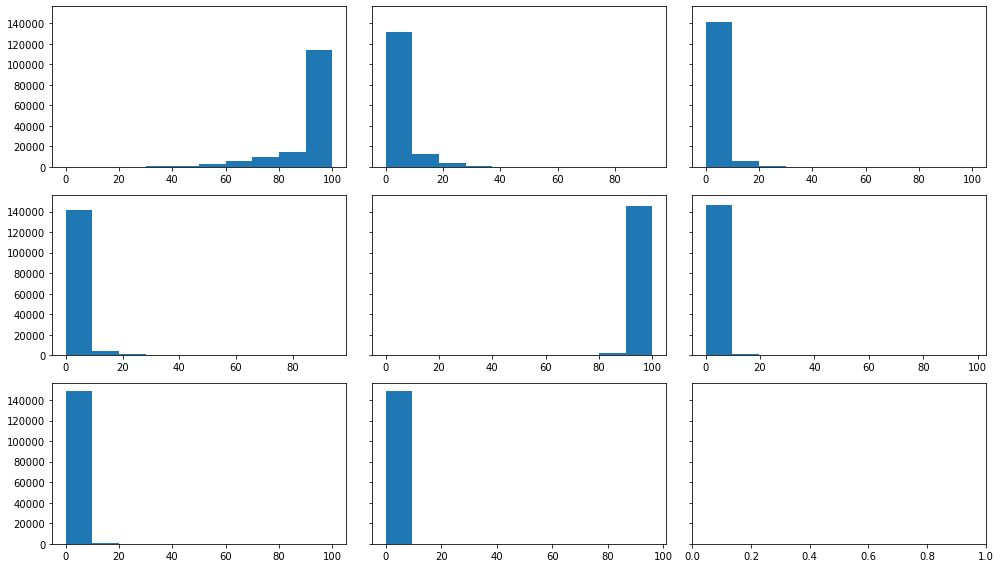

In [27]:
fig1, axes1 = plt.subplots(nrows=3, ncols=3, sharey=True, tight_layout=True)
fig1.set_size_inches(14, 8)
n_bins = 10

axes1[0][0].hist(db['DL TP < 50 Kbps (%)'], n_bins)
axes1[0][1].hist(db['50 Kbps < DL TP < 250 Kbps (%)'], n_bins)
axes1[0][2].hist(db['250 Kbps < DL TP < 1 Mbps (%)'], n_bins)
axes1[1][0].hist(db['DL TP > 1 Mbps (%)'], n_bins)
axes1[1][1].hist(db['UL TP < 10 Kbps (%)'], n_bins)
axes1[1][2].hist(db['10 Kbps < UL TP < 50 Kbps (%)'], n_bins)
axes1[2][0].hist(db['50 Kbps < UL TP < 300 Kbps (%)'], n_bins)
axes1[2][1].hist(db['UL TP > 300 Kbps (%)'], n_bins)

As shown in the above graph, those columns are skewed, so we can use median to fill the missing values

In [28]:
column_names = ['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', 
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
               'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']
db = du.fill_using_median(db, column_names)

In [29]:
# the name and datatype of each column with null count
pd.DataFrame(data=list(zip(db.columns, db.dtypes, db.isna().sum(), round((db.isna().sum() * 100)/150001))), columns=["name", "dtype", "# missing", "% Missing"])

,name,dtype,# missing,% Missing
0,Bearer Id,float64,991,1.00
1,Start,object,1,0.00
2,Start ms,float64,1,0.00
3,End,object,1,0.00
4,End ms,float64,1,0.00
5,Dur. (ms),float64,1,0.00
6,IMSI,float64,570,0.00
7,MSISDN/Number,float64,1066,1.00
8,IMEI,float64,572,0.00
9,Last Location Name,object,1153,1.00


In [30]:
column_names = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
                'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
               'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B',
                'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Start ms', 'End ms', 'Dur. (ms)']
db = du.fill_using_median(db, column_names)

In [31]:
# the name and datatype of each column with null count
pd.DataFrame(data=list(zip(db.columns, db.dtypes, db.isna().sum(), round((db.isna().sum() * 100)/150001))), columns=["name", "dtype", "# missing", "% Missing"])

,name,dtype,# missing,% Missing
0,Bearer Id,float64,991,1.00
1,Start,object,1,0.00
2,Start ms,float64,0,0.00
3,End,object,1,0.00
4,End ms,float64,0,0.00
5,Dur. (ms),float64,0,0.00
6,IMSI,float64,570,0.00
7,MSISDN/Number,float64,1066,1.00
8,IMEI,float64,572,0.00
9,Last Location Name,object,1153,1.00


In [32]:
column_names = ['Bearer Id','Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Activity Duration UL (ms)',
               'Last Location Name']
db = du.fill_using_mode(db, column_names)

In [33]:
# the name and datatype of each column with null count
pd.DataFrame(data=list(zip(db.columns, db.dtypes, db.isna().sum(), round((db.isna().sum() * 100)/150001))), columns=["name", "dtype", "# missing", "% Missing"])

,name,dtype,# missing,% Missing
0,Bearer Id,float64,0,0.00
1,Start,object,0,0.00
2,Start ms,float64,0,0.00
3,End,object,0,0.00
4,End ms,float64,0,0.00
5,Dur. (ms),float64,0,0.00
6,IMSI,float64,0,0.00
7,MSISDN/Number,float64,0,0.00
8,IMEI,float64,0,0.00
9,Last Location Name,object,0,0.00


In [34]:
du.missing_percent(db)

The dataset contains 0.25 % missing values.


In [35]:
# 'Handset Manufacturer', 'Handset Type'
name = 'Handset Manufacturer'

In [36]:
hm_mode = db[name].mode().iloc[0]

In [37]:
hs_mode = db[db["Handset Manufacturer"] == 'Apple']['Handset Type'].mode().iloc[0]

In [38]:
db[name].fillna(value=hm_mode, inplace=True)
db['Handset Type'].fillna(value=hs_mode, inplace=True)
# for line in dict(db.loc[pd.isnull(db[name]), [name]]['Handset Manufacturer']):
#     db.loc[line, "Handset Type"] =  hs_mode
#     db.loc[line, "Handset Manufacturer"] =  hm_mode

In [39]:
du.missing_percent(db)

The dataset contains 0.0 % missing values.


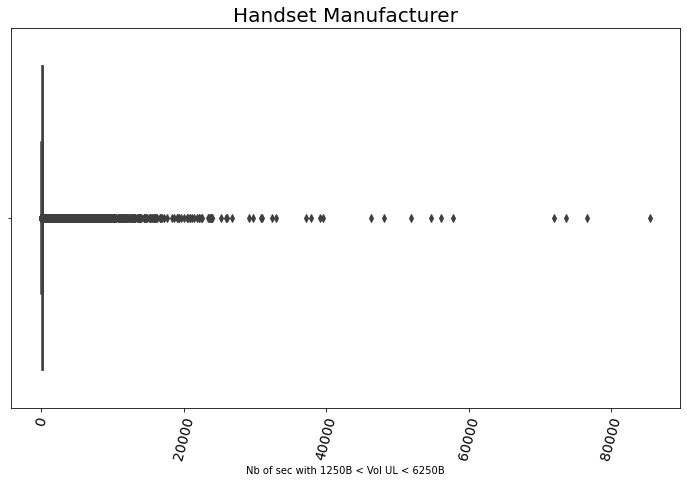

In [40]:
pu.plot_box(db, "Nb of sec with 1250B < Vol UL < 6250B", "Handset Manufacturer")

In [41]:
per_cust = du.remove_outlier(db, 'Nb of sec with 1250B < Vol UL < 6250B')

Old Shape:  (150001, 52)
New Shape:  (122600, 52)


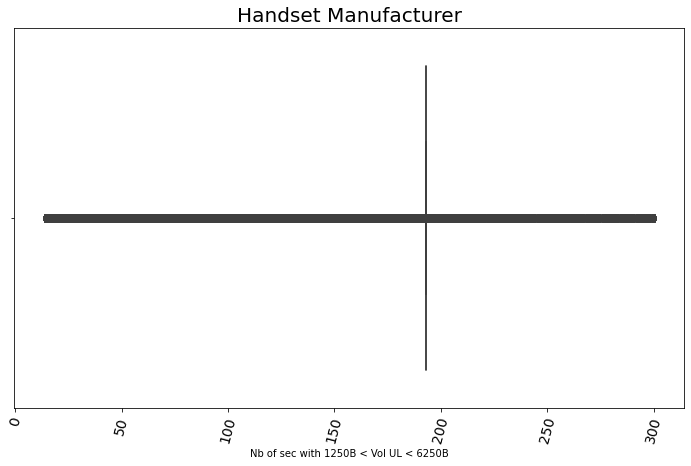

In [42]:
pu.plot_box(db, "Nb of sec with 1250B < Vol UL < 6250B", "Handset Manufacturer")

In [43]:
db.to_csv('../data/cleaned_telcom_data_final.csv', index=False)